In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [41]:
file_path = '/content/diabetes.csv'
diabetes_df = pd.read_csv(file_path)
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
# Step 1: Preprocess the data
# Handle missing values (if any)
diabetes_df = diabetes_df.fillna(diabetes_df.mean())

In [43]:
X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Standardize the feature variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Define a range of k values to test
k_values = range(1, 31)
cross_val_scores = []

# Perform cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

# Find the k value with the highest accuracy
best_k = k_values[np.argmax(cross_val_scores)]
best_accuracy = max(cross_val_scores)

best_k, best_accuracy


(27, 0.7671866737176097)

In [47]:
# Step 2: Train the k-NN model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=27)

In [48]:
# Step 3: Evaluate the model
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7467532467532467

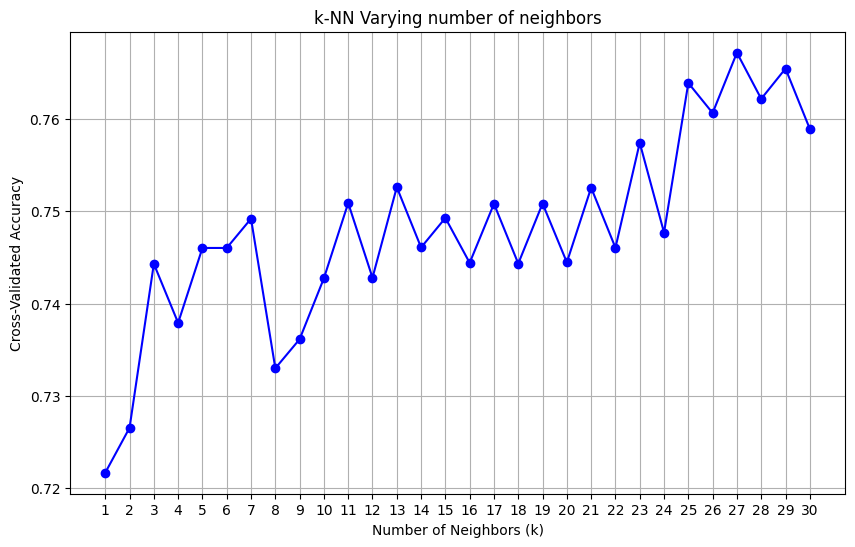

In [49]:
# Plot the accuracy scores for each k value
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validated Accuracy')
plt.title('k-NN Varying number of neighbors')
plt.xticks(k_values)
plt.grid(True)
plt.show()


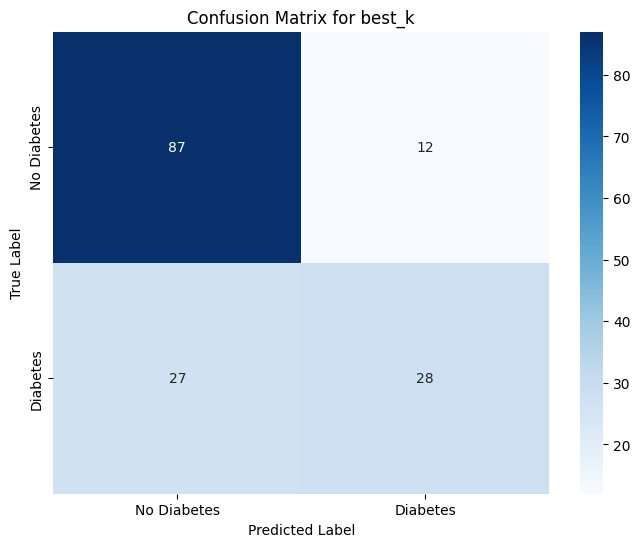

In [53]:


# Train the k-NN model with the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Predict the outcomes for the test set
y_pred_best = knn_best.predict(X_test_scaled)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for best_k')
plt.show()
